###  Packages Needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText


### Calculating average m and P/PET for the watersheds

In [4]:
#watersheds and path
watershed=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']
path='D:/UNBC/HydroMet_Project/Data/ERA5_land/'



Her=[];Ham_Min=[];Ham_Max=[];PP_Ham_Max=[];PP_Ham_Min=[]
for ws in watershed:
    #load climate data
    Tb=pd.read_excel(path+'Summary_ERA5_land_Monthly.xlsx', sheet_name=ws)
    
    #initilize arrays
    PET=[];Runoff_c=[];P_c=[]; PET_Ham_Min=[];PET_Ham_Max=[]
    
    #get water year runoff precipitation, PET_min, and PET_max
    Y=np.arange(1982,2019)
    for year in Y:
        R=np.nansum(Tb[((Tb.Year==year)&(Tb.Month<10))|((Tb.Year==year-1)&(Tb.Month>=10))]['Runoff'].values)
        P=np.nansum(Tb[((Tb.Year==year)&(Tb.Month<10))|((Tb.Year==year-1)&(Tb.Month>=10))]['Avg Precip'].values)
        PET_Ham_Min.append(np.nansum(Tb[((Tb.Year==year)&(Tb.Month<10))|((Tb.Year==year-1)&(Tb.Month>=10))]['Calc_PET_Ham_Min'].values))
        PET_Ham_Max.append(np.nansum(Tb[((Tb.Year==year)&(Tb.Month<10))|((Tb.Year==year-1)&(Tb.Month>=10))]['Calc_PET_Ham_Max'].values))

        
        
        Runoff_c.append(R/P)
        P_c.append(P)
    
    #mean precipitation, runoff, PET_min, PET_max
    P= np.nanmean(P_c)
    Runoff=np.nanmean(Runoff_c)
    PET_Ham_Min=np.nanmean(PET_Ham_Min)
    PET_Ham_Max=np.nanmean(PET_Ham_Max)
    
    #--------------------------- Min PET--------------------------------
    # Finding the approriate m values with minimum PET values for the watershed
    m=0.1
    H=1

    #while the difference between t and Runoff is greater than .001 keep increasing the side of m
    while H> 0.001:
        t= (1+(P/PET_Ham_Min)**-m)**(1/m)-(P/PET_Ham_Min)**-1
        H=abs(Runoff-t)

        if H>0.001:
            m=m+0.001
            
    # average m-value and P/PET values for the watershed
    Ham_Min.append(m)
    PP_Ham_Min.append(P/PET_Ham_Min)
    
    #------------------------------------Max PET-------------------------------------------------
     # Finding the approriate m values with minimum PET values for the watershed
    m=0.1
    H=1
    
    #while the difference between t and Runoff is greater than .001 keep increasing the side of m
    while H> 0.001:
        t= (1+(P/PET_Ham_Max)**-m)**(1/m)-(P/PET_Ham_Max)**-1
        H=abs(Runoff-t)

        if H>0.001:
            m=m+0.001
    
    # average m-value and P/PET values for the watershed
    Ham_Max.append(m)
    PP_Ham_Max.append(P/PET_Ham_Max)
    

### Plotting Fhu's m-value

C:\Anaconda3\envs\Trial\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


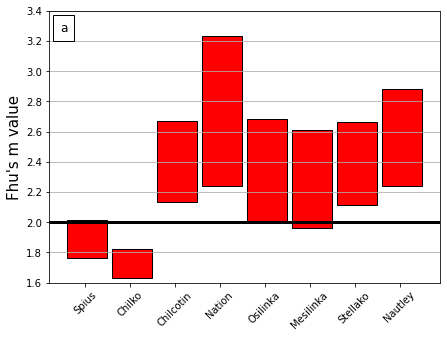

In [5]:
#watersheds
watershed=['','Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']

#initilize plots
fig,ax1 = plt.subplots(1,1, figsize=(7,5))
width=0.9

#plotting m-value range for each watershed
for i in np.arange(0,8):
    x=i-0.4
    y=Ham_Max[i]
    height=Ham_Min[i]-Ham_Max[i]
    ax1.add_patch(patches.Rectangle((x, y), width, height,facecolor='r', edgecolor='k'))
 
#initlize a plot (hidden points)
ax1.scatter(3,2.5)
ax1.set_xticklabels(watershed, size=10,rotation=45)

#----------------------------plotting parameters--------------------
ax1.grid(axis='y')
ax1.set_ylabel ("Fhu's m value", size=15)
ax1.axhline(2, color='k',linewidth=3)
ax1.set_ylim(1.6,3.4)
at = AnchoredText('a', prop=dict(size=12), frameon=True, loc='upper left')
at.patch.set_boxstyle("Square,pad=0.15")
ax1.add_artist(at)

#show and save figure
fig.show()
fig.savefig('C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/mvalue_Ham.eps')


### Plotting average P/PET values

C:\Anaconda3\envs\Trial\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


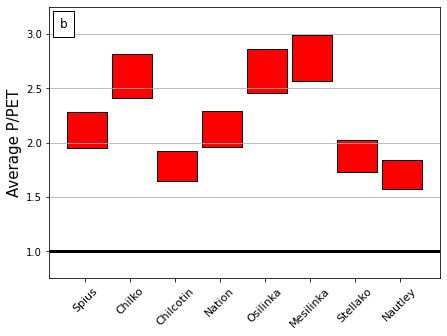

In [7]:
watershed=['','Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']

#initilize plots
fig,ax1 = plt.subplots(1,1, figsize=(7,5))
width=0.9

#plot range of  P/PET values for each watershed
for i in np.arange(0,8):
    x=i-0.4
    y=PP_Ham_Max[i]
    height=PP_Ham_Min[i]-PP_Ham_Max[i]
    ax1.add_patch(patches.Rectangle((x, y), width, height,facecolor='r', edgecolor='k'))

#initilize plot (hidden points)
ax1.scatter(3,2.2)

# -----------------------------plot parameters---------------------------
ax1.set_xticklabels(watershed, size=11,rotation=45)
ax1.grid(axis='y')
ax1.set_ylabel ("Average P/PET", size=15)
ax1.axhline(1, color='k',linewidth=3)
at = AnchoredText('b', prop=dict(size=12), frameon=True, loc='upper left')
at.patch.set_boxstyle("Square,pad=0.15")
ax1.add_artist(at)
ax1.set_ylim(0.75,3.25)

#show figure and save
fig.show()
fig.savefig('C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/PET_Ham.eps')